In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# H clustering

In [3]:
#normalization

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x) 

In [5]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


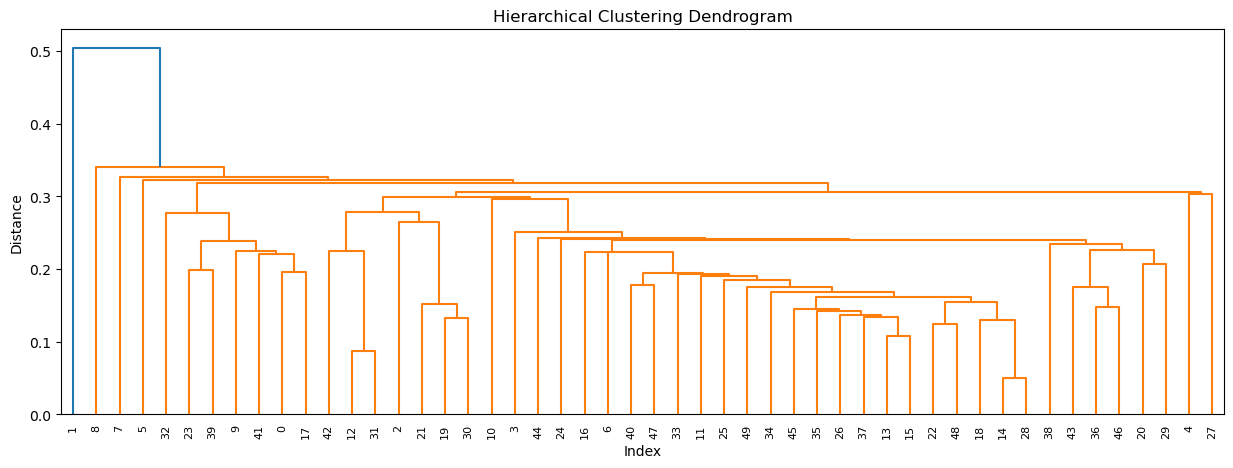

In [6]:
#making dendogram
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # to create dendrogram  
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    
)
plt.show()


In [7]:
#it is very difficult to form clusters by using these dendogram so, we go for another method

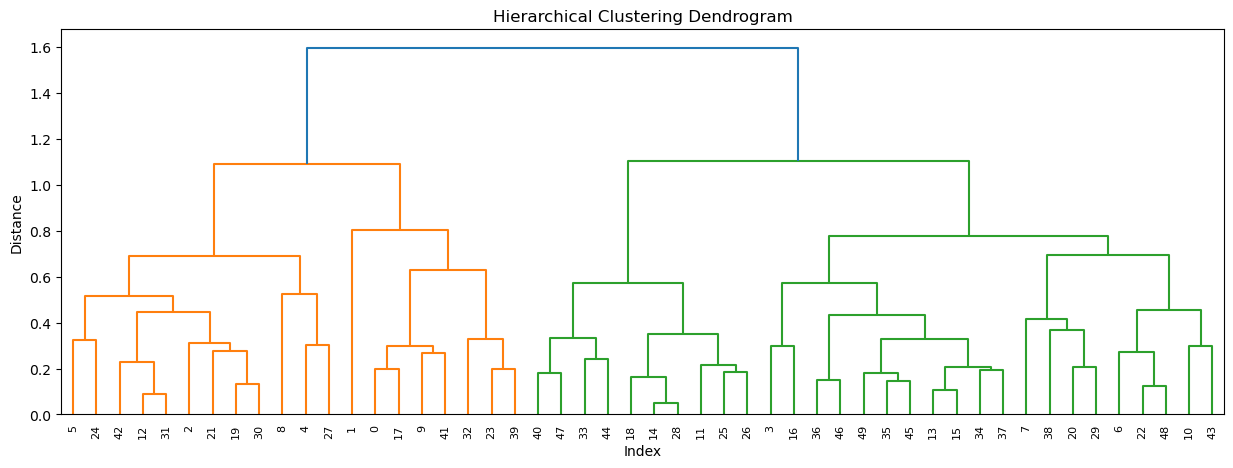

In [8]:
#making dendogram
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # to create dendrogram  
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    
)
plt.show()


In [9]:
#it is not suggestable to take these method so, we go for average method

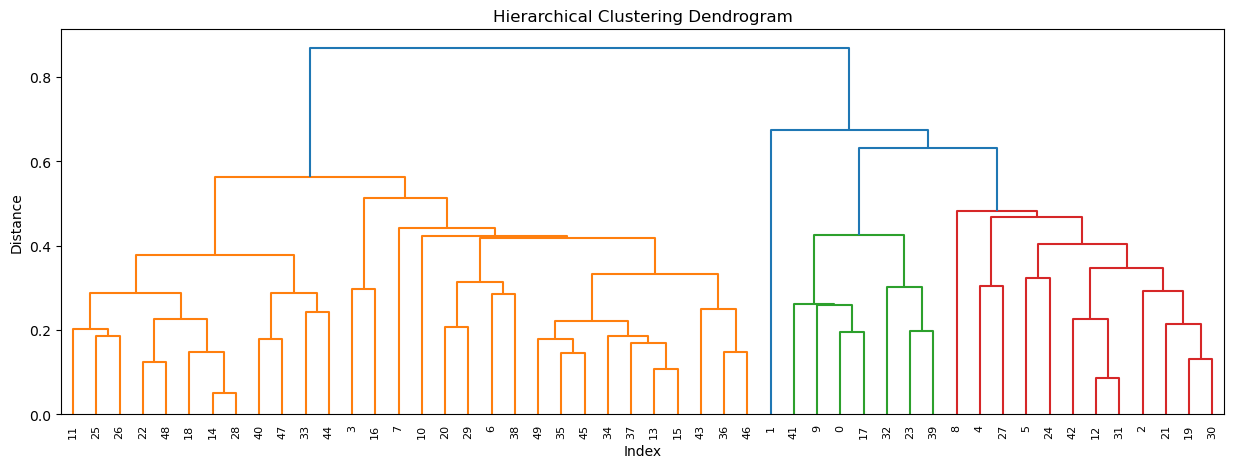

In [10]:
#making dendogram
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # to create dendrogram  
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    
)
plt.show()


In [11]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=6, linkage='average',affinity = "euclidean").fit(df_norm) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels 
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,5
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [12]:
df.iloc[:,1:].groupby(df.clust).mean()   

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.883333,256.916667,78.333333,32.250000,0.0
1,5.656250,138.875000,73.875000,18.781250,1.0
2,9.250000,149.500000,51.000000,17.900000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0
5,10.000000,263.000000,48.000000,44.500000,5.0


In [13]:
#by observing these we can say that the cluster4 is the best cluster and that it is the place to stay happily

In [14]:
data = df[(df.clust==4)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,4
14,Iowa,2.2,56,57,11.3,4
18,Maine,2.1,83,51,7.8,4
22,Minnesota,2.7,72,66,14.9,4
25,Montana,6.0,109,53,16.4,4
26,Nebraska,4.3,102,62,16.5,4
28,New Hampshire,2.1,57,56,9.5,4
33,North Dakota,0.8,45,44,7.3,4
40,South Dakota,3.8,86,45,12.8,4
44,Vermont,2.2,48,32,11.2,4


In [15]:
#these cluster has best cluster to stay as it has very low murder and rape rate as compared to other clusters

In [16]:
data = df[(df.clust==1)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
20,Massachusetts,4.4,149,85,16.3,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1


In [17]:
data = df[(df.clust==2)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
16,Kentucky,9.7,109,52,16.3,2


In [18]:
data = df[(df.clust==5)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,5


In [19]:
data = df[(df.clust==0)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0
30,New Mexico,11.4,285,70,32.1,0


In [20]:
data = df[(df.clust==3)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


# Kmeans clustering

In [21]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

In [22]:
yt = pd.read_csv('crime_data.csv')
yt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [23]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x) 

In [24]:
yt_norm = norm_func(yt.iloc[:,1:])  

In [25]:
yt_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


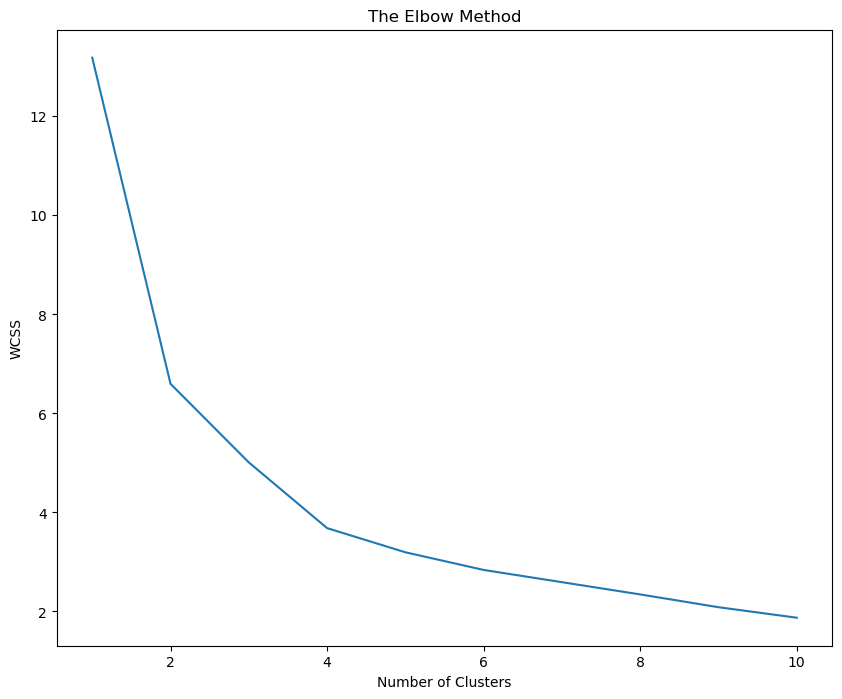

In [26]:
fig = plt.figure(figsize=(10, 8))
WCSS = []    
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(yt_norm)
    WCSS.append(clf.inertia_) # inertia another name for wcss
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [27]:
#in above curve we find that there is 5 clusters

In [28]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(yt_norm)  

In [29]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([3, 1, 1, 4, 1, 1, 2, 4, 1, 3, 2, 0, 1, 4, 0, 4, 4, 3, 0, 1, 2, 1,
       0, 3, 4, 4, 4, 1, 0, 2, 1, 1, 3, 0, 2, 4, 4, 2, 2, 3, 0, 3, 1, 2,
       0, 4, 2, 0, 0, 4])

In [30]:
y_kmeans

array([3, 1, 1, 4, 1, 1, 2, 4, 1, 3, 2, 0, 1, 4, 0, 4, 4, 3, 0, 1, 2, 1,
       0, 3, 4, 4, 4, 1, 0, 2, 1, 1, 3, 0, 2, 4, 4, 2, 2, 3, 0, 3, 1, 2,
       0, 4, 2, 0, 0, 4])

In [31]:
clf.cluster_centers_ 

array([[0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142]])

In [32]:
clf.inertia_

3.183157731676654

In [33]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
yt['clust']=md # creating a  new column and assigning it to new column 
yt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [34]:
yt.iloc[:,1:7].groupby(yt.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,2.680000,70.100000,51.000000,10.910000,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,4.955556,125.444444,80.111111,17.788889,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,6.975000,148.416667,62.333333,19.775000,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

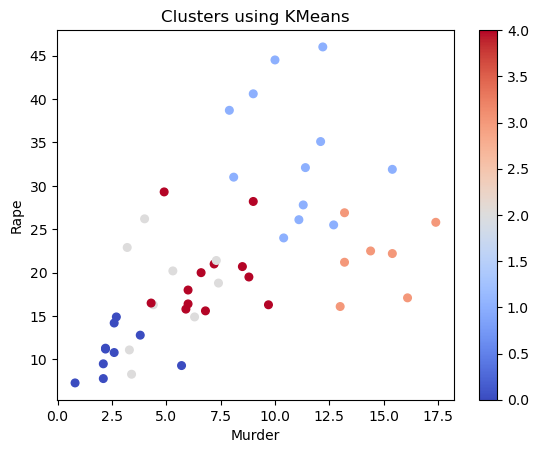

In [35]:
yt.plot(x="Murder",y ="Rape",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [36]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.1953603385661578,
 2.838930997048136,
 2.591569284969667,
 2.3442123488767983,
 2.086086267250655,
 1.8738550189865313]

# DB scan

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [38]:
pt = pd.read_csv('crime_data.csv')
pt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [39]:
print(pt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [40]:
pt1= pt.iloc[:,1:]
pt1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [41]:
array = pt1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [42]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X   

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [43]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)                      

DBSCAN(eps=0.475)

In [44]:
# here -1 implies noise
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [45]:
#here -1 values are consider as noise

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [47]:
cl
pd.set_option("display.max_rows", None)  

In [48]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [49]:
pt = pd.concat([pt1,cl],axis=1)  
pt   

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


Text(0.5, 1.0, 'Clusters using DBScan')

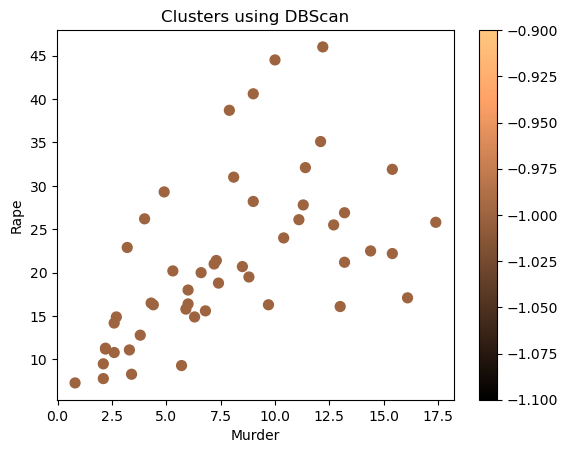

In [50]:
import matplotlib.pyplot as plt 
pt1.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper) 
plt.title('Clusters using DBScan')      

In [56]:
dl = dbscan.labels_     
dl

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [52]:
#silhoutte score is not showing  and it is showing error because it contains only noise and there is no clusters due to these it is showing error

In [53]:
#while comparing these with 3 methods it is find that Hierachy clustering method is best and efficient